In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn


In [2]:
# Model Import Statements
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split 

# Visualisation Import Statements
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

The Model

In [3]:
# Read Dataset
df = pd.read_csv('dataset_processed.csv')

# Split Dataframe into Features and Target

x = df.drop(['Outcome', 'id', 'profit_2', 'profit_x','odds_ft_x', 'odds_ft_2'], axis=1) #Features
y = df['Outcome']

# Split Dataframe into Train and Test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
# Initialize Logistic Regression model with specified hyperparameters

log_reg = LogisticRegression(penalty = 'l2', multi_class='multinomial', max_iter=1000, class_weight='balanced')

# Train model on the training data
log_reg.fit(x_train, y_train)

/Users/pranavbatchu/miniconda3/envs/ml_hw1/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial')

In [5]:
# Make predictions on the test data using the trained model
predictions = log_reg.predict(x_test)

# Calculate the accuracy of the model on the test data
acc = accuracy_score(predictions, y_test)
print(f"Accuracy: {acc}")

Accuracy: 0.7589339794064204


Visualizing Model + Quantitative Metrics

In [6]:
# Visualizations
cm = confusion_matrix(predictions, y_test)
class_report = classification_report(predictions, y_test)

In [7]:
feature_importance = rf.feature_importances_ #importances for each feature saved by random forest
features = x_train.columns #features are columns from x
idxs = np.argsort(feature_importance)[::-1] #flip importance - most important first

#now plot features

plt.figure(figsize=(8,6))
plt.barh(range(len(features)), feature_importance[idxs], align='center')
plt.yticks(range(len(features)), np.array(features)[idxs])
plt.xlabel('Importance')
plt.title('Importance by Feature')
plt.show()

NameError: name 'rf' is not defined

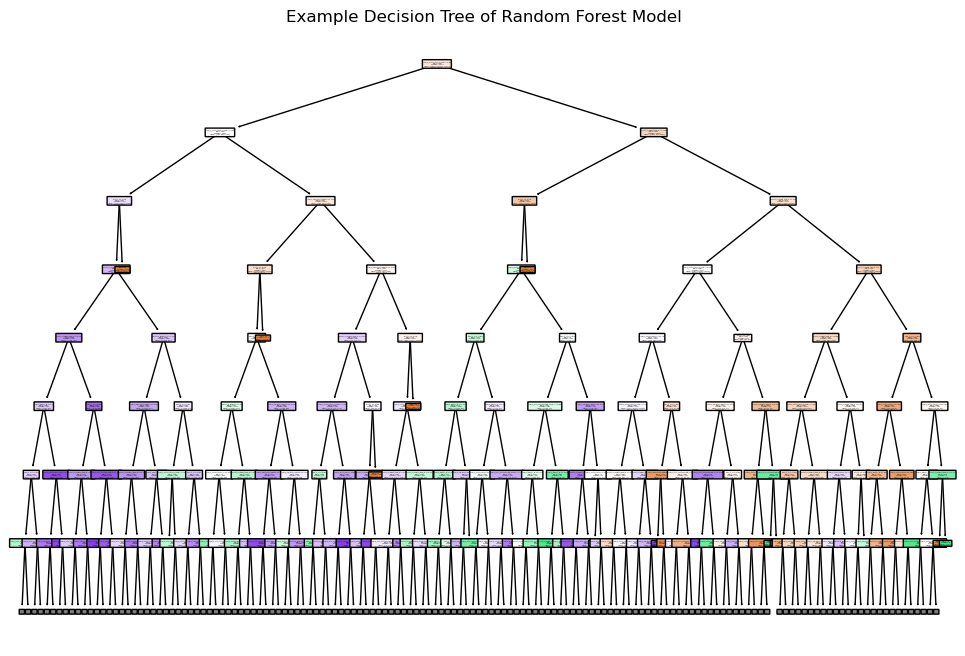

In [ ]:
#visualizing a decision tree

plt.figure(figsize=(12,8)) 
plot_tree(rf.estimators_[0], filled=True, max_depth = 7, feature_names=features, class_names=['Class 0', 'Class 1', 'Class 2'], rounded=True)
#set max_depth, full tree was too large
plt.title('Example Decision Tree of Random Forest Model')
plt.show()

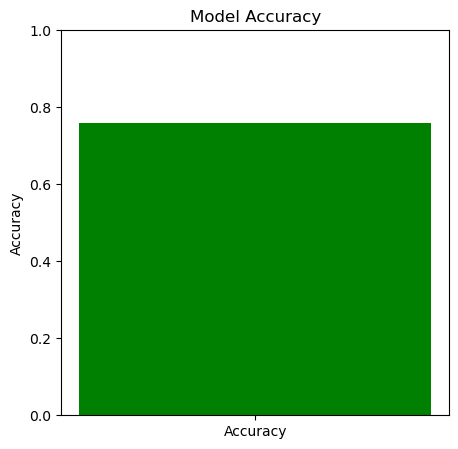

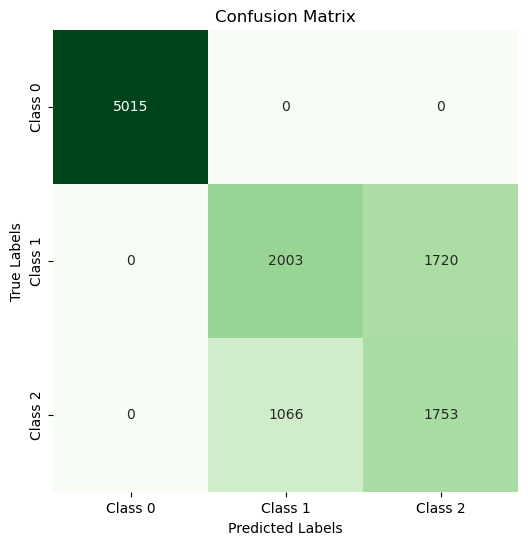

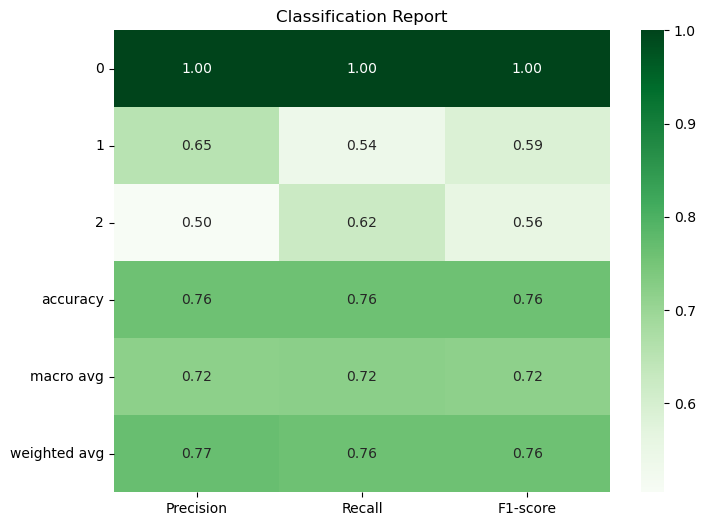

In [ ]:
#accuracy
plt.figure(figsize=(5, 5))
plt.bar(['Accuracy'], [acc], color='Green')
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()

#cm

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#class report

class_report = classification_report(predictions, y_test, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose().iloc[:, :-1]

plt.figure(figsize=(8, 6))
sns.heatmap(class_report_df.astype(float), annot=True, cmap='Greens', cbar=True, fmt='.2f', 
            xticklabels=['Precision', 'Recall', 'F1-score'], yticklabels=class_report_df.index)
plt.title('Classification Report')
plt.show()

